In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson,expon,binom

### Import data set

In [60]:
df=pd.read_csv("aerofit_treadmill.txt")

In [61]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [62]:
# Data type

In [63]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [64]:
df.shape


(180, 9)

In [65]:
df.ndim

2

In [66]:
df.size

1620

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [68]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [69]:
# Na values

In [70]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [71]:
# There is no null values in this data set

In [72]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#  Outliers

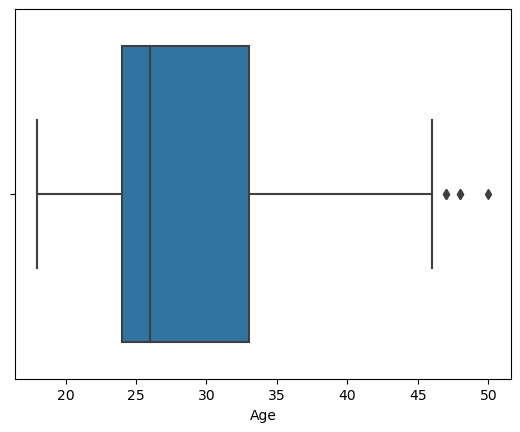

In [73]:
# for age
sns.boxplot(x=df['Age'])
plt.show()

In [74]:
q1_age=df['Age'].quantile(0.25)
q3_age=df['Age'].quantile(0.75)
iqr_age=q3_age-q1_age
iqr_age
df[(df['Age']<(q1_age-1.5*iqr_age)) | (df['Age']>(q3_age+1.5*iqr_age)) ]['Age'].reset_index()

,index,Age
0,78,47
1,79,50
2,139,48
3,178,47
4,179,48


In [75]:
# These are the outliers for age


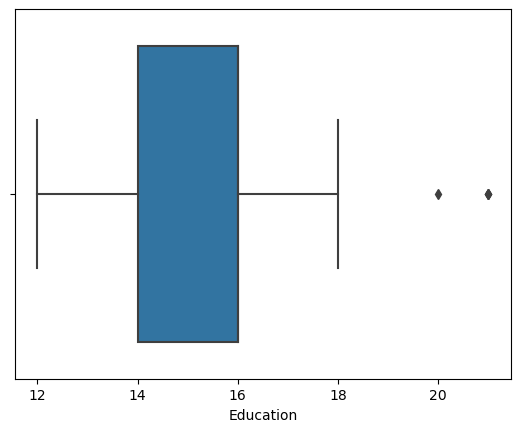

In [76]:
# for Education
sns.boxplot(x=df['Education'])
plt.show()

In [77]:
q1_e=df['Education'].quantile(0.25)
q3_e=df['Education'].quantile(0.75)
iqr_e=q3_e-q1_e
iqr_e
df[(df['Education']<(q1_e-1.5*iqr_e)) | (df['Education']>(q3_e+1.5*iqr_e)) ]['Education'].reset_index()

,index,Education
0,156,20
1,157,21
2,161,21
3,175,21


In [78]:
# Above values are outliers for education

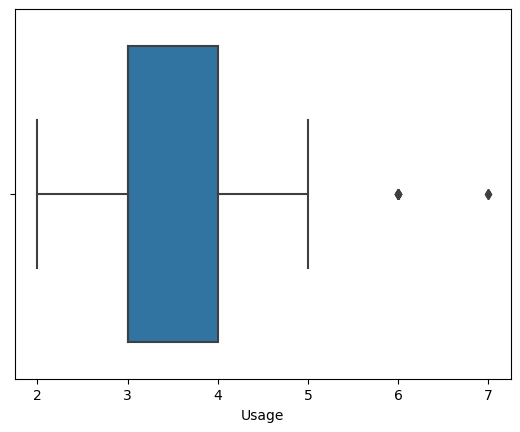

In [79]:
# for Usage
sns.boxplot(x=df['Usage'])
plt.show()

In [80]:
q1_u=df['Usage'].quantile(0.25)
q3_u=df['Usage'].quantile(0.75)
iqr_u=q3_u-q1_u
iqr_u
df[(df['Usage']<(q1_u-1.5*iqr_u)) | (df['Usage']>(q3_u+1.5*iqr_u)) ]['Usage'].reset_index()

,index,Usage
0,154,6
1,155,6
2,162,6
3,163,7
4,164,6
5,166,7
6,167,6
7,170,6
8,175,6


In [81]:
# These are outliers for the usage

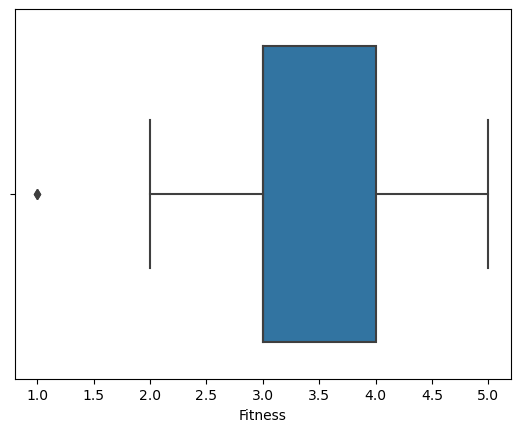

In [82]:
# for Fitness
sns.boxplot(x=df['Fitness'])
plt.show()

In [83]:
q1_f=df['Fitness'].quantile(0.25)
q3_f=df['Fitness'].quantile(0.75)
iqr_f=q3_f-q1_f
iqr_f
df[(df['Fitness']<(q1_f-1.5*iqr_f)) | (df['Fitness']>(q3_f+1.5*iqr_f)) ]['Fitness'].reset_index()

,index,Fitness
0,14,1
1,117,1


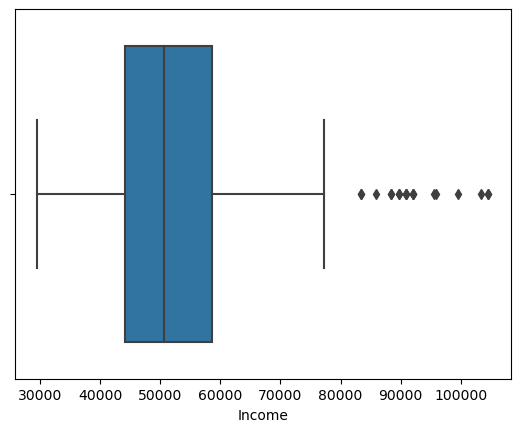

In [84]:
# for Income
sns.boxplot(x=df['Income'])
plt.show()

In [85]:
q1_i=df['Income'].quantile(0.25)
q3_i=df['Income'].quantile(0.75)
iqr_i=q3_i-q1_i
iqr_i
df[(df['Income']<(q1_i-1.5*iqr_i)) | (df['Income']>(q3_i+1.5*iqr_i)) ]['Income'].reset_index()

,index,Income
0,159,83416
1,160,88396
2,161,90886
3,162,92131
4,164,88396
5,166,85906
6,167,90886
7,168,103336
8,169,99601
9,170,89641


In [86]:
# These are the outliers for income

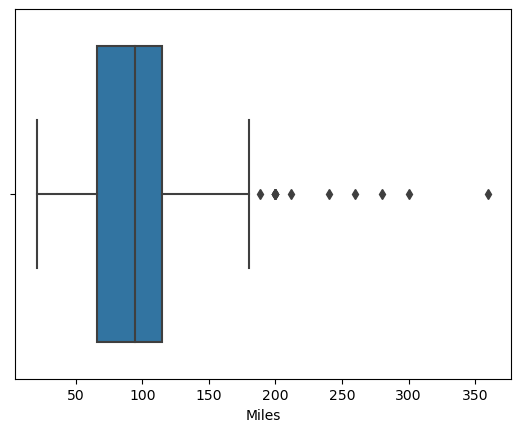

In [87]:
# for Miles
sns.boxplot(x=df['Miles'])
plt.show()

In [88]:
q1_m=df['Miles'].quantile(0.25)
q3_m=df['Miles'].quantile(0.75)
iqr_m=q3_m-q1_m
iqr_m
df[(df['Miles']<(q1_m-1.5*iqr_m)) | (df['Miles']>(q3_m+1.5*iqr_m)) ]['Miles'].reset_index()

,index,Miles
0,23,188
1,84,212
2,142,200
3,148,200
4,152,200
5,155,240
6,166,300
7,167,280
8,170,260
9,171,200


In [89]:
# These are the outliers for Miles

In [90]:
# lower_bound = np.percentile(df['Age'], 5)
# upper_bound = np.percentile(df['Age'], 95)
# df['Age'] = np.clip(df['Age'], lower_bound, upper_bound)

In [91]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Univariate

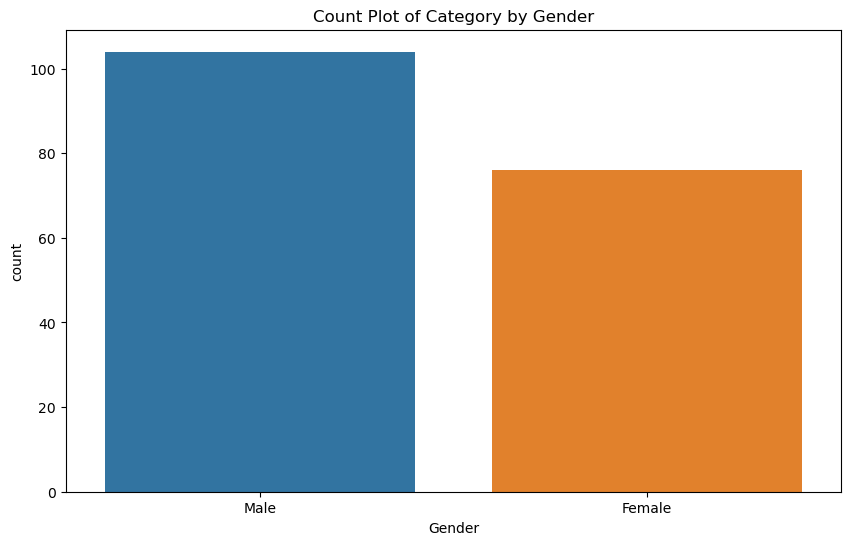

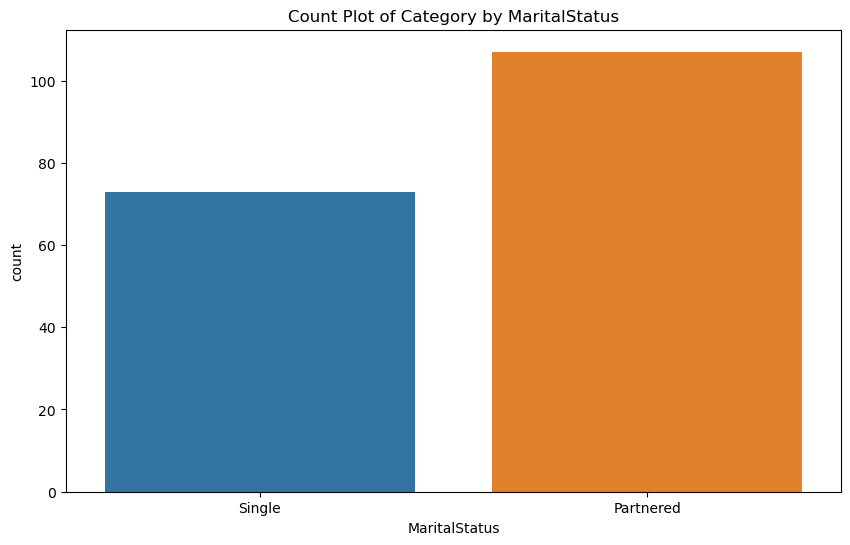

In [209]:
columns_to_plot = ['Gender','MaritalStatus']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of Category by {column}')
    plt.show()

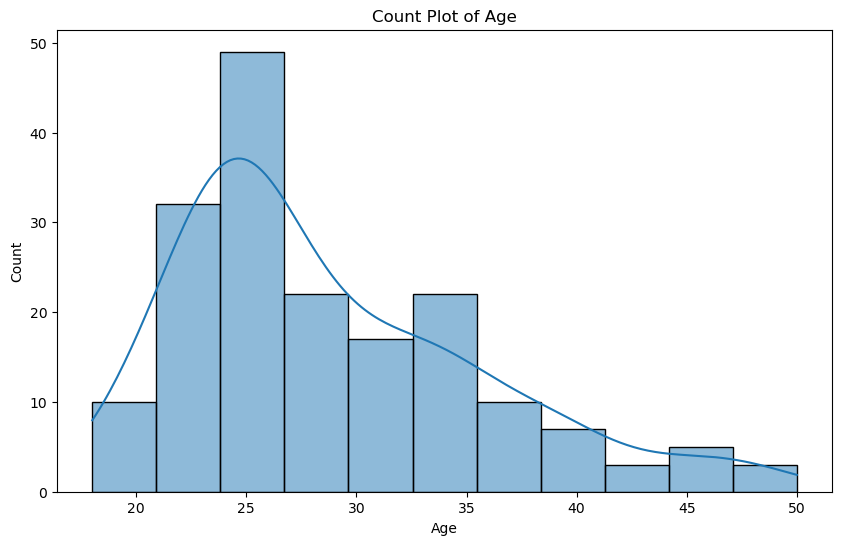

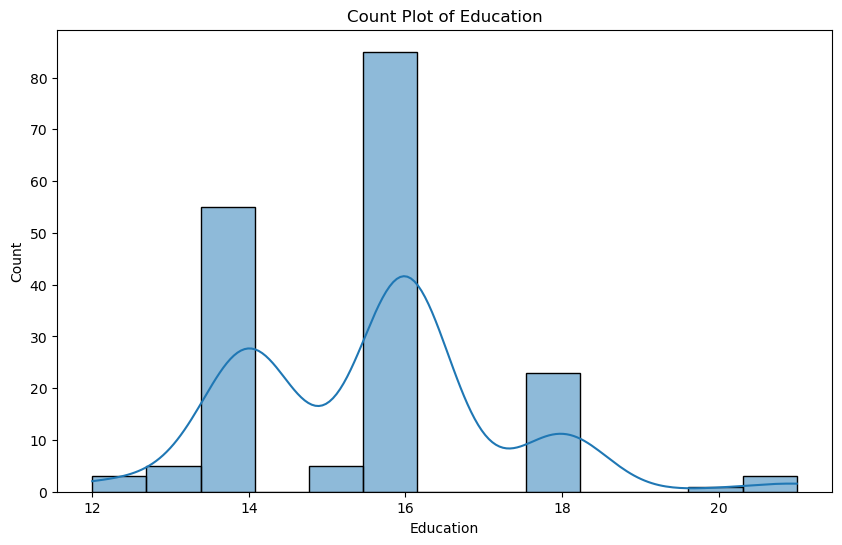

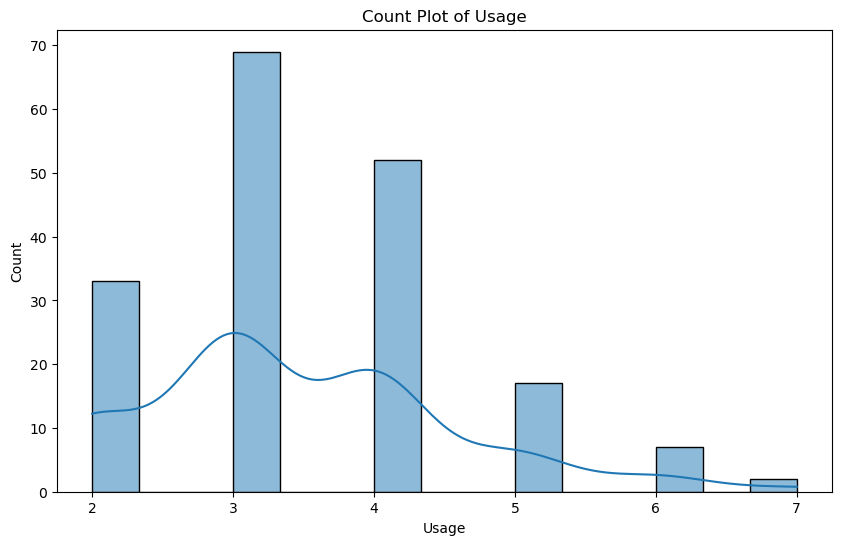

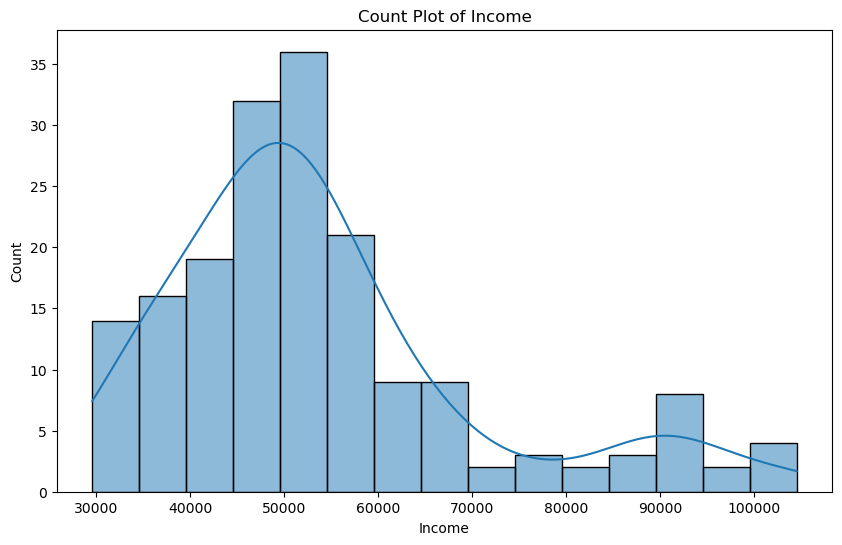

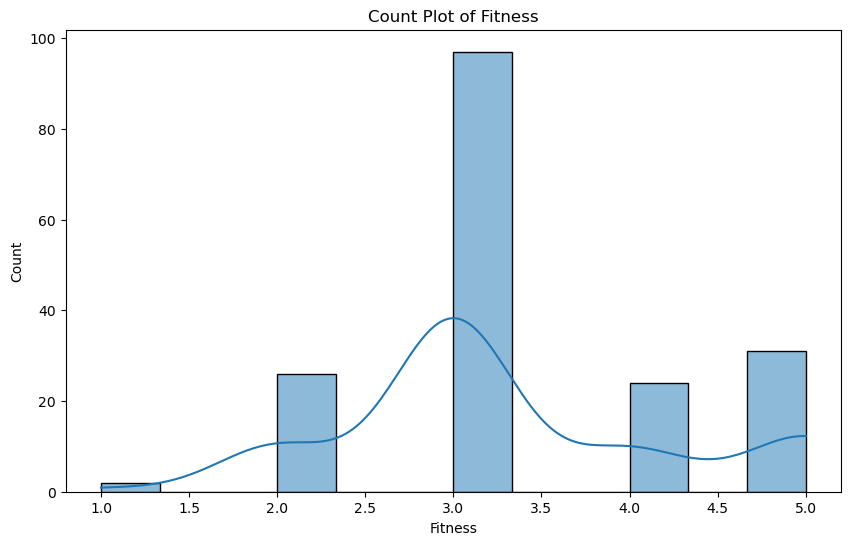

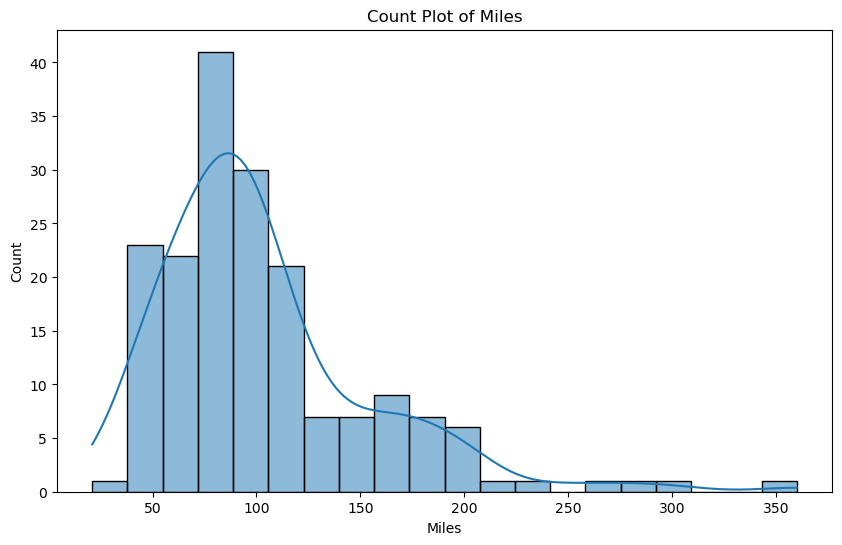

In [208]:
columns_to_plot = ['Age','Education','Usage','Income','Fitness','Miles']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column,kde=True)
    plt.title(f'Count Plot of {column}')
    plt.show()

* There are more men than women using the treadmill, and there are more partnered customers compared to singles.
* Many users around 25 years old, have 16 years of education and earn over $50,000.
* Most people have a fitness level of 3 and use a treadmill three times a week

#  Bivariate

# Product vs Gender

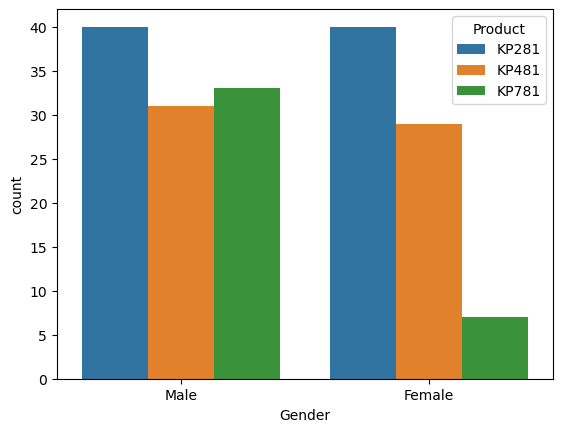

In [92]:
sns.countplot(df,x='Gender',hue='Product')
plt.show()

##### In the both the gender mostly use an entry-level treadmill that sells for $1,500.
##### In KP481 slightly males are using KP481 and it appear that males are  use advance treadmill 

# Product vs MaritalStatus

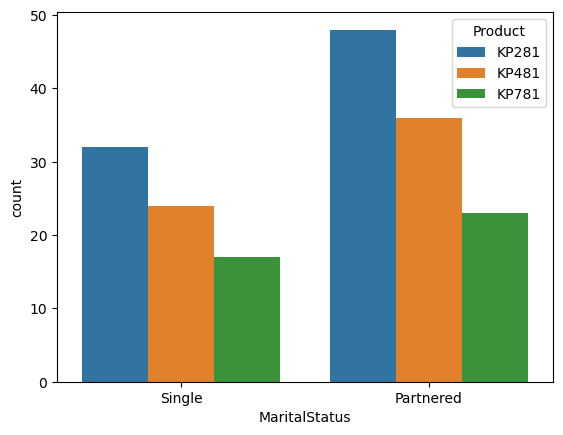

In [93]:
sns.countplot(df,x='MaritalStatus',hue='Product')
plt.show()

##### Customer who is Partnered, are purchased the more product

# Product vs Age

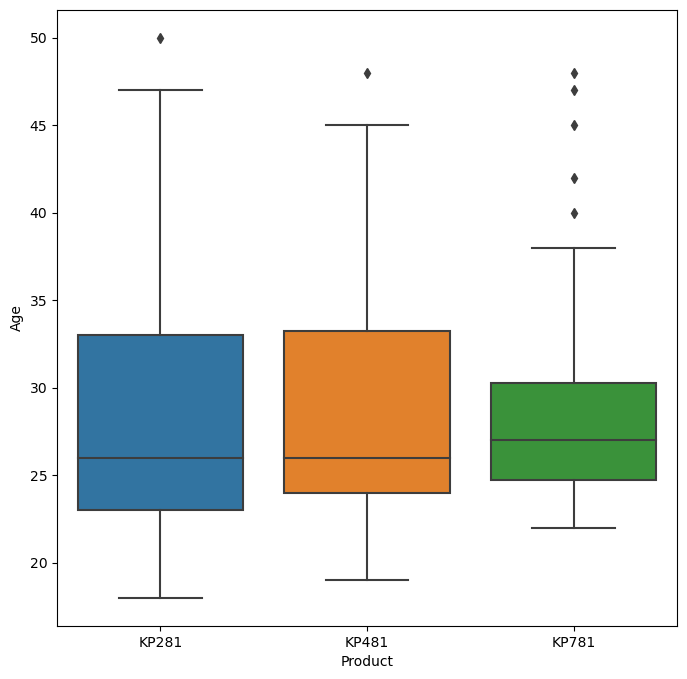

In [94]:
plt.figure(figsize =(8, 8)) 
sns.boxplot(df,y='Age',x='Product')
plt.show()

##### Customer purchasing product kp281 and kp481 both having the same age median value
##### and Age between the 25 and 30 are more likely to buy kp781

# Product vs Income

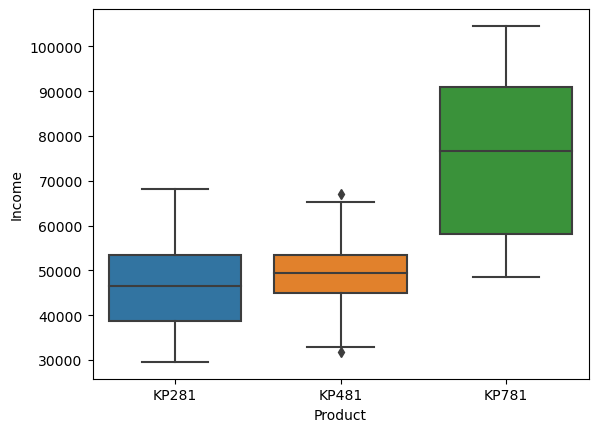

In [95]:
sns.boxplot(df,y='Income',x='Product')
plt.show()


##### People who earn between 38,000 and 54,000 are likely to buy kP281. 
##### Among those earning between 45,000 and 54,000, there's a preference for purchasing kp481. 
##### Customers with incomes of 60,000 or more chance to purchase  KP781.

# Product vs Education

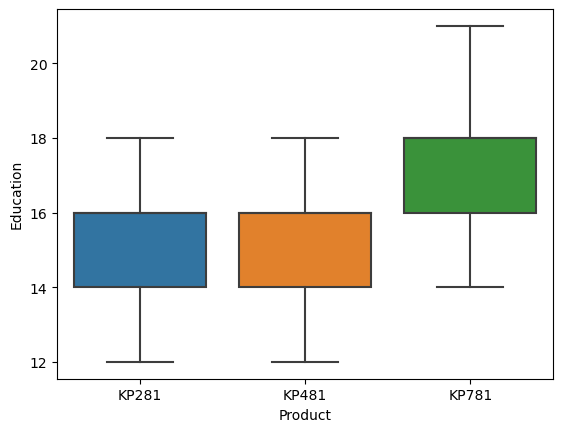

In [96]:
sns.boxplot(df,y='Education',x='Product')
plt.show()

##### Education more than 16, have more chance to buy KP789
##### Education less than 16 hvaing equal chance to buy KP281 & Kp481

# Product vs Usage

<Axes: xlabel='Product', ylabel='Usage'>

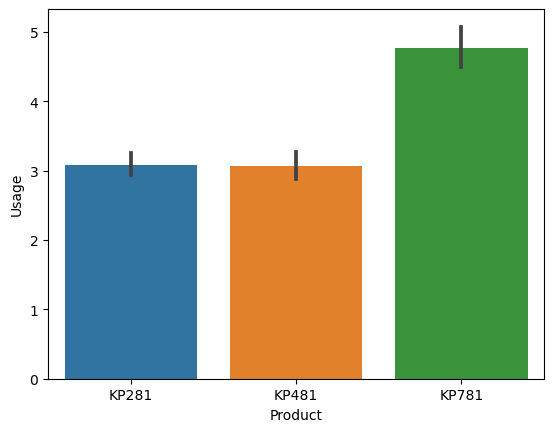

In [97]:
sns.barplot(df,x='Product',y='Usage')

##### Customers who use treadmills > 4  are more likely to buy KP781. 
##### Other customers have an equal chance of buying either KP281 or KP481.

# Product vs Fitness

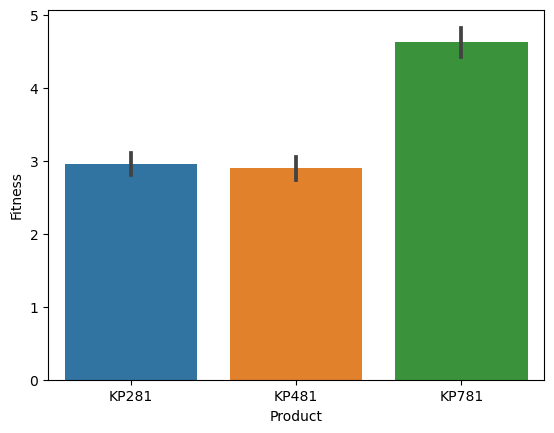

In [98]:
sns.barplot(df,x='Product',y='Fitness')
plt.show()

##### Customers with a fitness level of 4 or higher have a higher chances of purchasing KP781.

# Product vs Fitness

<Axes: xlabel='Product', ylabel='Miles'>

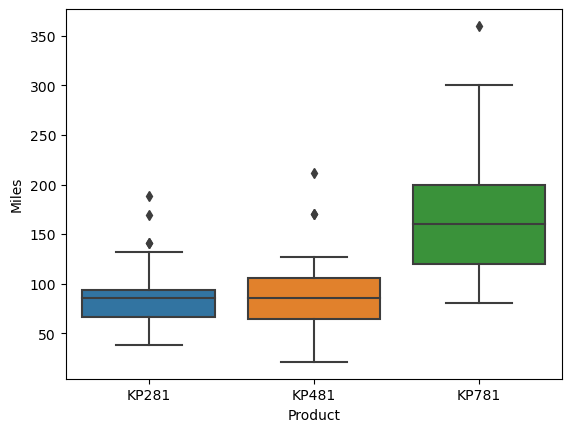

In [99]:
sns.boxplot(df,x="Product",y="Miles")

# Representing the Probability

In [100]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [101]:
crosstab_product=pd.crosstab(index=df['Product'],columns='count')
crosstab_product

col_0,count
Product,
KP281,80
KP481,60
KP781,40


In [102]:
marginal_probablity=crosstab_product/crosstab_product.sum()
marginal_probablity*100

col_0,count
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


##### 44% probablity that customers have purchased KP281
##### 33% probablity that customers have purchased KP481
##### 22% probablity that customers have purchased KP781

In [103]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Prduct vs Gender

In [104]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


##### 57.78% of male customers are using the products, while 42.22% of female customers are using the products

# Prduct vs MaritalStatus

In [105]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000


##### 59.44% of users are partnered, while 40.56% of users are single

#  Conditional probability

##### Probablity(Product | Gender)

In [106]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [107]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index') 

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


* p(KP281 | Male )=0.38
* p(KP481 | Male )=0.30
* p(KP781 | Male )=0.32
* p(KP281 | Female )=0.53
* p(KP481 | Female )=0.38
* p(KP781 | Female )=0.09

##### Probablity(Gender | Product)

In [108]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [109]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='columns')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


* p( Female | KP281)=0.5
* p( Female | KP281)=0.48
* p( Female | KP281)=0.0.18
* p( Male | KP281 )=0.5
* p( Male | KP281 )=0.52
* p( Male | KP281 )=0.83

##### Probablity(Product | MaritalStatus)

In [110]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [111]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True,normalize='index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


* p(KP281 | Partnered)=0.45
* p(KP281 | Partnered)=0.34
* p(KP281 | Partnered)=0.21
* p(KP281 | Single)=0.44
* p(KP281 | Single)=0.33
* p(KP281 | Single)=0.23

##### Probablity( MaritalStatus | Product)

In [112]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [113]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True,normalize='columns')

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.6,0.6,0.575,0.594444
Single,0.4,0.4,0.425,0.405556


* p( Partnered | KP281)=0.6
* p( Partnered | KP281)=0.6
* p( Partnered | KP281)=0.57
* p( Single | KP281 )=0.4
* p( Single | KP281 )=0.4
* p( Single | KP281 )=0.43

# correlation

In [114]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [115]:
cor=df.corr(numeric_only=True)
cor

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


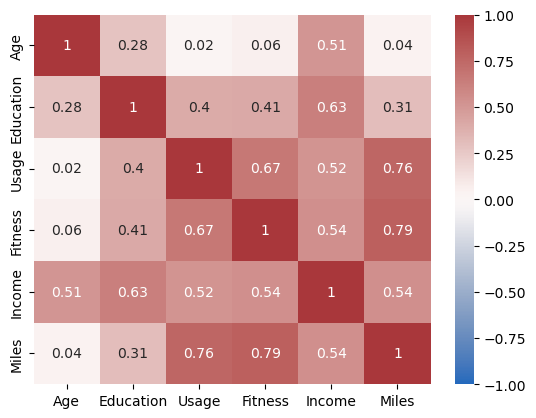

In [116]:
sns.heatmap(cor.round(2),annot=True,vmin=-1,vmax=1,center=0,cmap='vlag')
plt.show()

# Customer Profiling

# KP281
* Age: 23 to 33
* Income: Less than 53,000
* Gender: Both genders equally represented
* Marital Status: Partnered users are more likely to purchase KP281
* Usage: Between 0 to 3 times per week
* Fitness: Fitness level ranging from 0 to 3

# KP481

* Age: 24 to 33
* Income: Most customers have salaries between 49,000 to 55,000
* Gender: Almost equal chance to buy KP481 for both genders
* Marital Status: Partnered users have a 60% probability of purchasing KP281, while single users have a 40% probability of                   purchasing KP481
* Usage: Between 0 to 3 times per week
* Fitness: Fitness level ranging from 0 to 3

# KP781

* Age: 25 to 31
* Income: Most customers have salaries between 58,000 to 91,000
* Gender: Males have an 82% probability of buying KP781
* Marital Status: Partnered users are more likely to purchase KP781, with a probability of 57%
* Usage: More than 5 times a week
* Fitness: Fitness level ranging from greater than 4

# Recommendations

* They should add new features in KP481 because the users for KP281 and KP481 are the same. This way, people can get extra functionality by paying a little more.
* In all three products, females are fewer. To increase sales, offer some sort of discount, especially for KP781.
* To increase revenue, the company can create a top-quality, luxury product designed for customers who are well-educated and earn a high income.
* It appears that there are more users of KP281 and KP481, i.e., entry-level and mid-level products used by young age groups. Promoting their products in colleges, on social media, and through advertisements will help increase sales.